In [1]:
### Check Working directory

import os
print("Working dir: ", os.getcwd())

os.chdir(os.pardir)         # change working dir to parents dir
print("Changed dir: ", os.getcwd())

Working dir:  c:\Users\user20\Desktop\추천시스템\rec_system\py_src
Changed dir:  c:\Users\user20\Desktop\추천시스템\rec_system


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

class CalcSim:
    def __init__(self, df):
        """
        init method
        df: pandas DataFrame
        """
        self.df = df                        # None selected df
        self.data = df.iloc[:, 1:].values   # Select factor columns df
        self.index = df.index


    def cos_sim(self):
        """
        Cosine Similarity
        """
        # calculation cosine similarity about all items
        cosine_similarity_matrix = cosine_similarity(self.data)

        # declare a list to save data
        similarity_results = []

        # for loop for cosine similarity
        for i in range((len(cosine_similarity_matrix))):
            for j in range(i + 1, len(cosine_similarity_matrix)):
                similarity_results.append([i +1, j +1, cosine_similarity_matrix[i, j]])


        # save data as pandas DataFrame
        return pd.DataFrame(similarity_results, columns = ["Row1", "Row2", "Cosine Similarity"])


    def euclidean_dist(self, col_range):
        """
        Euclidean Distance
        col_range: range of columns
        """
        # declare a list to save data
        euclidean_results = []

        # range of columns
        col_name = list(self.df.columns)
        """
        All factors are indpendent and exclusive. devide factors respectively. 
        """
        # for loop for euclidean distance
        for col_idx in col_range:

            # DataFrame to NumPy array
            data_column = self.df.iloc[:, col_idx].values.reshape(-1, 1)

            # calculation euclidean distance about all items
            euclidean_dist_matrix = euclidean_distances(data_column)

            # for loop for euclidean distance
            for i in range(len(euclidean_dist_matrix)):
                for j in range(i + 1, len(euclidean_dist_matrix)):
                    euclidean_results.append([i + 1, j + 1, col_name[col_idx], euclidean_dist_matrix[i, j]])

        # save result of distance (i != j)
        return pd.DataFrame(euclidean_results, columns=["Row1", "Row2", "Factor", "Euclidean Distance"])


    def heatmap(self, sim_type, col_range = None, plot_size = (10, 8), location = None, file_name = None):
        """
        Heatmap Visualization
        sim_type: "cosine" or "euclidean" select data type
        col_range: For Euclidean distance, you must provide the range of columns as a list. This is not required for cosine similarity.
        plot_size: heatmap size(default : (10, 8))
        """
        

        if sim_type == "cosine":
            cosine_sim_matrix = cosine_similarity(self.data)
            plt.figure(figsize = plot_size)
            sns.heatmap(cosine_sim_matrix, cmap='coolwarm', annot = False, cbar = True)
            plt.title('Cosine Similarity Heatmap')
            plt.xlabel('Row Index')
            plt.ylabel('Row Index')
            plt.savefig(location + '/' + file_name)
            plt.show()
            print(plot_size)

        elif sim_type == "euclidean" and col_range is not None:

            col_name = list(self.df.columns)

            for col_idx in col_range:
                data_column = self.df.iloc[:, col_idx].values.reshape(-1, 1)
                euclidean_dist_matrix = euclidean_distances(data_column)
                plt.figure(figsize = plot_size)
                sns.heatmap(euclidean_dist_matrix, cmap='coolwarm', annot = False, cbar = True)
                plt.title(f'Euclidean Distance Heatmap (Factor: {self.df.columns[col_idx]})')
                plt.xlabel('Row Index')
                plt.ylabel('Row Index')
                plt.savefig(location + '/' + col_name[col_idx]+ '_' + file_name)
                plt.show()
                print(plot_size)

                
        else:
            raise ValueError("Invalid sim_type. Choose 'cosine' or 'euclidean' and provide col_range for 'euclidean'.")


    def save_to_csv(self, df, location, file_name):
        """
        Save DataFrame as CSV format
        df: pandas DataFrame
        location: location to save directory
        file_name: file name to save
        """
        df.to_csv(f'{location}/{file_name}', index=False)
        print(f"{file_name} saved as a CSV file at {location}/{file_name}")


"""
pipeline

class sequential
"""

'\npipeline\n\nclass sequential\n'

               Row1          Row2  Cosine Similarity
count  31125.000000  31125.000000       31125.000000
mean      83.666667    167.333333           0.964076
std       58.807596     58.807596           0.027477
min        1.000000      2.000000           0.785344
25%       34.000000    126.000000           0.951067
50%       74.000000    177.000000           0.971214
75%      125.000000    217.000000           0.984393
max      249.000000    250.000000           0.999927


       Row1  Row2  Cosine Similarity
0         1     2           0.951905
1         1     3           0.966918
2         1     4           0.975332
3         1     5           0.966944
4         1     6           0.958614
...     ...   ...                ...
31120   247   249           0.979177
31121   247   250           0.968925
31122   248   249           0.980273
31123   248   250           0.992880
31124   249   250           0.968722

[31125 rows x 3 columns]
cosine_sim.csv saved as a CSV file at result/cosine

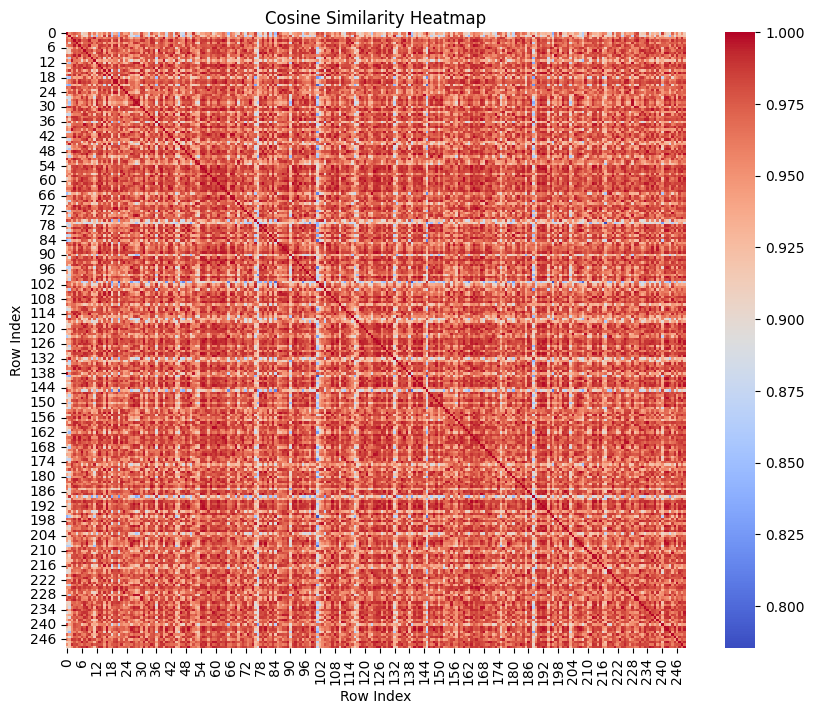

(10, 8)




In [3]:
if __name__ == "__main__":

    # get raw data
    df = pd.read_excel('raw_data/refined_data.xlsx')

    # initiate class
    data = CalcSim(df)

    # cosine similarity
    cosine_df = data.cos_sim()

    print(cosine_df.describe())
    print('\n')
    print(cosine_df)
    loc = "result"
    fname = "cosine_sim.csv"
    data.save_to_csv(cosine_df, loc, fname)
    
    # heatmap
    figsize = (10, 8)
    fname = "cosine_sim.png"
    data.heatmap("cosine", None, figsize, loc, fname)

    print('\n')


                Row1           Row2  Euclidean Distance
count  155625.000000  155625.000000       155625.000000
mean       83.666667     167.333333            0.822543
std        58.806840      58.806840            0.626909
min         1.000000       2.000000            0.000000
25%        34.000000     126.000000            0.300000
50%        74.000000     177.000000            0.700000
75%       125.000000     217.000000            1.200000
max       249.000000     250.000000            3.670000


        Row1  Row2 Factor  Euclidean Distance
0          1     2    EXT                0.15
1          1     3    EXT                1.94
2          1     4    EXT                1.30
3          1     5    EXT                0.95
4          1     6    EXT                1.10
...      ...   ...    ...                 ...
155620   247   249    OPN                1.10
155621   247   250    OPN                0.35
155622   248   249    OPN                1.10
155623   248   250    OPN         

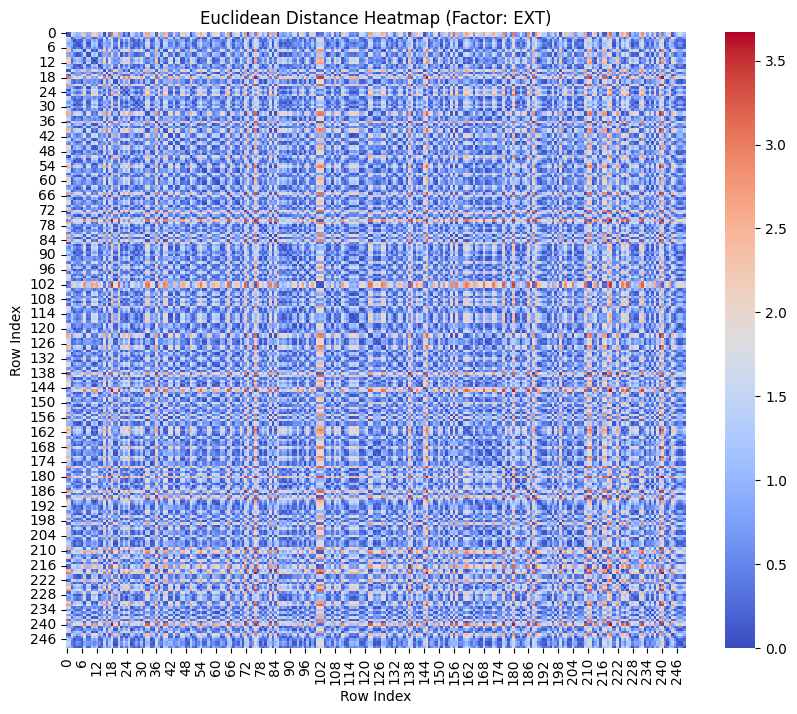

(10, 8)


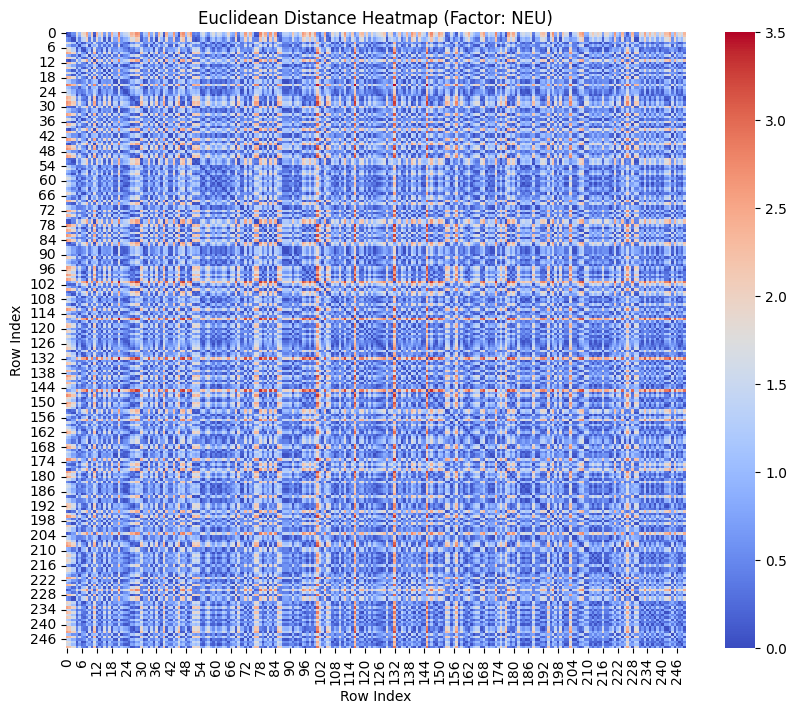

(10, 8)


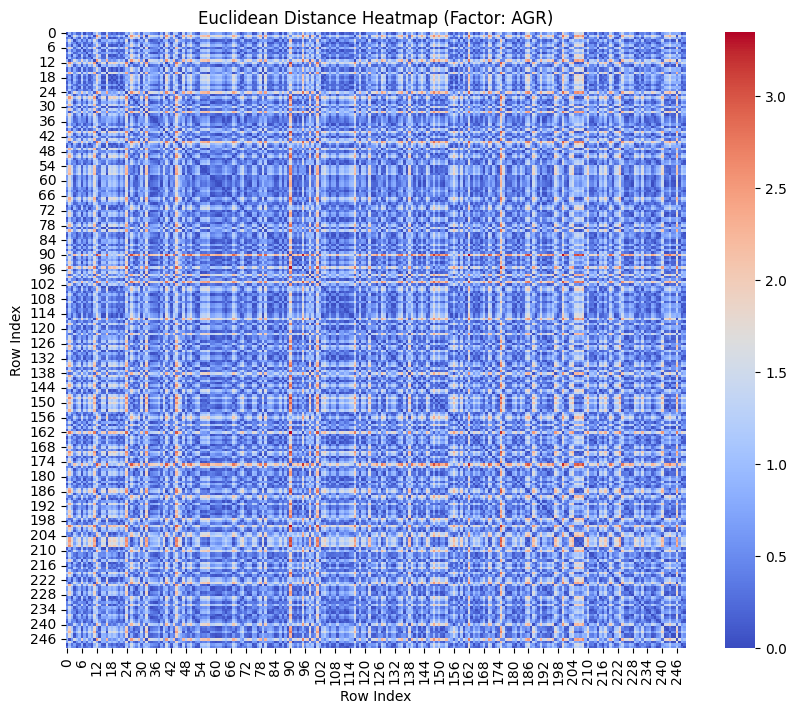

(10, 8)


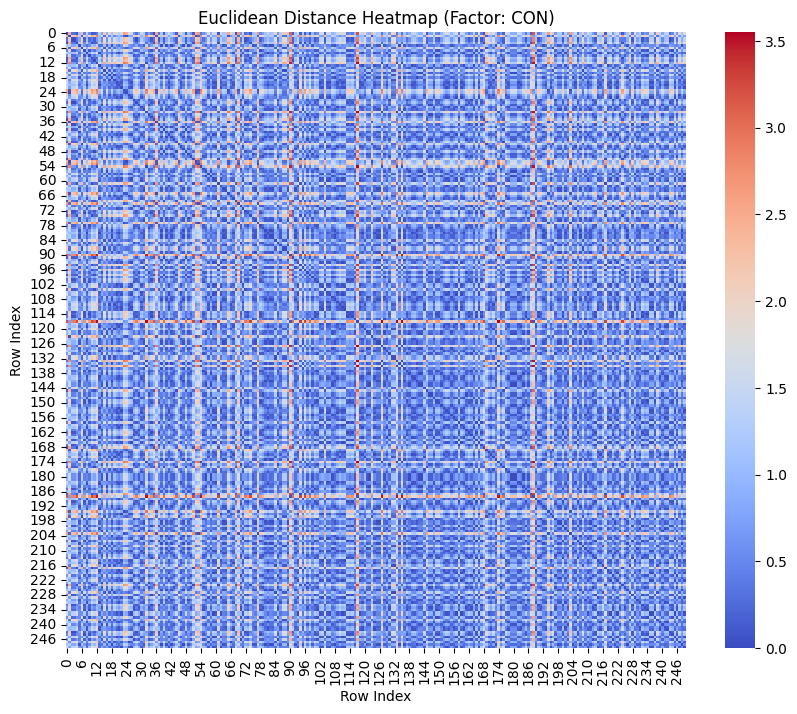

(10, 8)


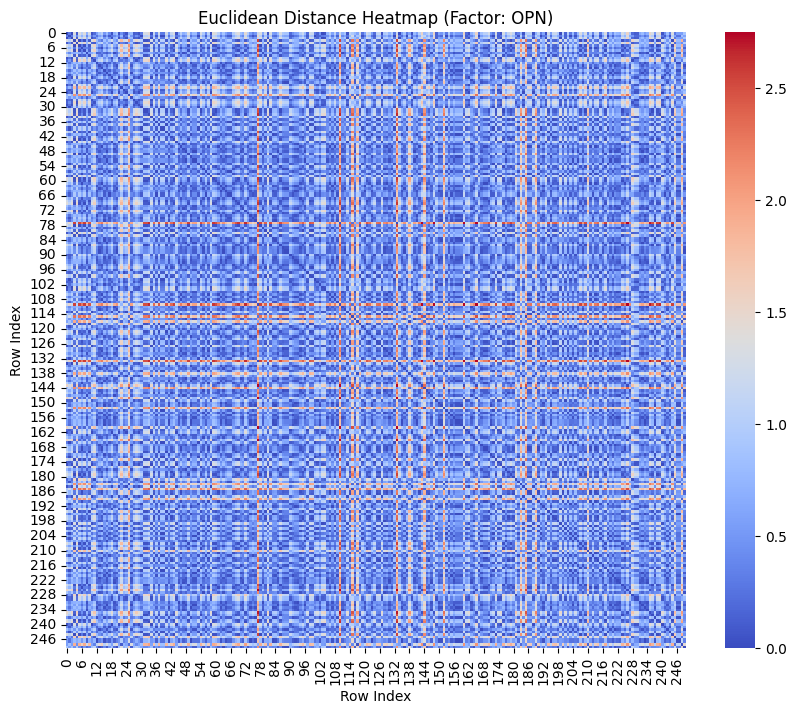

(10, 8)


In [4]:
if __name__ == "__main__":
    
    # euclidean distance
    col_range = range(1, len(list(df.columns)))
    eucl_df = data.euclidean_dist(col_range)
    
    print(eucl_df.describe())
    print('\n')
    print(eucl_df)

    fname = "eucl_dist.csv"
    data.save_to_csv(eucl_df, loc, fname)
    
    # heatmap
    fname = "eucl_dist.png"
    data.heatmap('euclidean', col_range, figsize, loc, fname)
    